In [2]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm 
import seaborn as sns
from astropy.io import ascii 
import matplotlib.pyplot as plt
import scipy.optimize as fit

data=ascii.read('final_project_data.csv')
data

#Imported all the neccessary packages and then uploaded the data set from the exoplanet archieve 
#This is the website that I retrieved it from https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS. 

pl_name,discoverymethod,disc_facility,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_metratio,sy_dist,sy_disterr1,sy_disterr2
str29,str29,str46,float64,float64,float64,int64,float64,float64,float64,int64,float64,float64,float64,int64,float64,float64,float64,int64,float64,float64,float64,int64,str6,float64,float64,float64
11 Com b,Radial Velocity,Xinglong Station,--,--,--,--,5434.7,540.3,-413.2,0,--,--,--,--,--,--,--,--,2.6,0.4,-0.3,0,--,93.1846,1.9238,-1.9238
11 Com b,Radial Velocity,Xinglong Station,--,--,--,--,6165.6,476.7,-476.7,0,4742.0,100.0,-100.0,0,19.0,2.0,-2.0,0,2.7,0.3,-0.3,0,[Fe/H],93.1846,1.9238,-1.9238
11 Com b,Radial Velocity,Xinglong Station,--,--,--,--,4914.89849,39.09289,-39.72855,0,4874.0,--,--,0,13.76,2.85,-2.45,0,2.09,0.64,-0.63,0,[Fe/H],93.1846,1.9238,-1.9238
11 UMi b,Radial Velocity,Thueringer Landessternwarte Tautenburg,--,--,--,--,4684.8142,794.575,-794.575,0,4213.0,46.0,-46.0,0,29.79,2.84,-2.84,0,2.78,0.69,-0.69,0,[Fe/H],125.321,1.9765,-1.9765
11 UMi b,Radial Velocity,Thueringer Landessternwarte Tautenburg,--,--,--,--,3432.4,381.4,-413.2,0,--,--,--,--,--,--,--,--,1.7,0.4,-0.3,0,--,125.321,1.9765,-1.9765
11 UMi b,Radial Velocity,Thueringer Landessternwarte Tautenburg,--,--,--,--,3337.07,785.01,-785.01,0,4340.0,70.0,-70.0,0,24.08,1.84,-1.84,0,1.8,0.25,-0.25,0,[Fe/H],125.321,1.9765,-1.9765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ups And d,Radial Velocity,Multiple Observatories,--,--,--,--,1313.22,9.21668,-9.21668,0,--,--,--,--,1.56,--,--,0,1.3,--,--,0,--,13.4054,0.0635,-0.0629
ups And d,Radial Velocity,Multiple Observatories,--,--,--,--,1255.38,50.85,-50.85,0,--,--,--,--,--,--,--,--,--,--,--,--,--,13.4054,0.0635,-0.0629


In [3]:
df=data.to_pandas()
df
#Converted my datatable into a pandas dataframe to manipulate.

,pl_name,discoverymethod,disc_facility,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,...,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_metratio,sy_dist,sy_disterr1,sy_disterr2
0,11 Com b,Radial Velocity,Xinglong Station,NaN,NaN,NaN,<NA>,5434.70000,540.30000,-413.20000,...,NaN,<NA>,2.60,0.40,-0.30,0,NaN,93.1846,1.92380,-1.92380
1,11 Com b,Radial Velocity,Xinglong Station,NaN,NaN,NaN,<NA>,6165.60000,476.70000,-476.70000,...,-2.00,0,2.70,0.30,-0.30,0,[Fe/H],93.1846,1.92380,-1.92380
2,11 Com b,Radial Velocity,Xinglong Station,NaN,NaN,NaN,<NA>,4914.89849,39.09289,-39.72855,...,-2.45,0,2.09,0.64,-0.63,0,[Fe/H],93.1846,1.92380,-1.92380
3,11 UMi b,Radial Velocity,Thueringer Landessternwarte Tautenburg,NaN,NaN,NaN,<NA>,4684.81420,794.57500,-794.57500,...,-2.84,0,2.78,0.69,-0.69,0,[Fe/H],125.3210,1.97650,-1.97650
4,11 UMi b,Radial Velocity,Thueringer Landessternwarte Tautenburg,NaN,NaN,NaN,<NA>,3432.40000,381.40000,-413.20000,...,NaN,<NA>,1.70,0.40,-0.30,0,NaN,125.3210,1.97650,-1.97650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35916,ups And d,Radial Velocity,Multiple Observatories,NaN,NaN,NaN,<NA>,1255.38000,41.32000,-41.32000,...,NaN,<NA>,NaN,NaN,NaN,<NA>,NaN,13.4054,0.06350,-0.06290
35917,ups Leo b,Radial Velocity,Okayama Astrophysical Observatory,NaN,NaN,NaN,<NA>,162.09249,19.06970,-82.63539,...,-0.45,0,1.48,0.90,-0.38,0,[Fe/H],52.5973,0.92720,-0.89630
35918,xi Aql b,Radial Velocity,Okayama Astrophysical Observatory,NaN,NaN,NaN,<NA>,642.00000,63.60000,-63.60000,...,NaN,<NA>,1.40,0.20,-0.20,0,NaN,56.1858,0.55975,-0.55975
35919,xi Aql b,Radial Velocity,Okayama Astrophysical Observatory,NaN,NaN,NaN,<NA>,890.00000,NaN,NaN,...,NaN,0,2.20,NaN,NaN,0,[Fe/H],56.1858,0.55975,-0.55975


In [4]:
df1=df[['pl_name', 'discoverymethod', 'sy_dist', 'st_mass']]
#Isolated the dataset to only include values including the planet name, 
#distance, discovery method, and mass

In [132]:
df_no1=df1.loc[(df1['st_mass']<=4)]
df_no1
df_no2=df_no1.drop_duplicates()
df_no2
df_no=df_no.dropna()
df_no 

#Data Filtering: Each Data Point is accurate as this is from the Exoplanent
#database. To ensure that there were no outliers I ran the first line of code 
#after I saw that there was about 15 data points outside of a mass range of 4. 
#I droppped all the NaNs in order to best fit the data for a curve later on.
#Lastly I ran the 3rd line of code in this cell to ensure that there was no duplicates.


,pl_name,discoverymethod,sy_dist,st_mass
0,11 Com b,Radial Velocity,93.1846,2.60
1,11 Com b,Radial Velocity,93.1846,2.70
2,11 Com b,Radial Velocity,93.1846,2.09
3,11 UMi b,Radial Velocity,125.3210,2.78
4,11 UMi b,Radial Velocity,125.3210,1.70
...,...,...,...,...
35914,ups And d,Radial Velocity,13.4054,1.30
35917,ups Leo b,Radial Velocity,52.5973,1.48
35918,xi Aql b,Radial Velocity,56.1858,1.40
35919,xi Aql b,Radial Velocity,56.1858,2.20


In [133]:
std_curve=df_no['sy_dist'].std()
std_curve
#found the standard deviation of my data to plug into the p0 of curve plotting

947.0131759240561

In [134]:
m_curve=df_no['sy_dist'].mean()
m_curve
#found the mean of my data set to plug into the p0 of curve plotting

746.5442313816491

/Users/faithblea/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


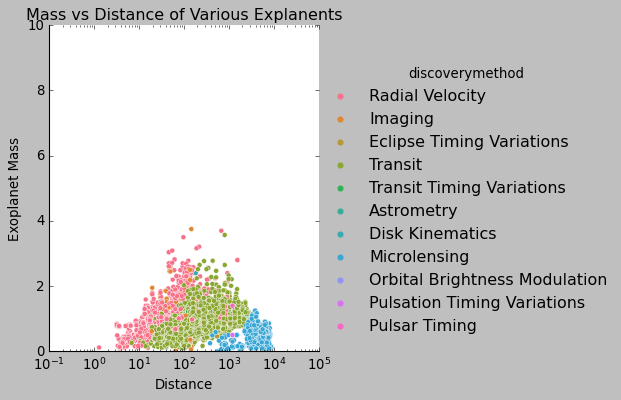

In [135]:
xdata='sy_dist'
ydata='st_mass'

pg= sns.relplot(data=df_no, x='sy_dist', y='st_mass', hue='discoverymethod')

plt.figure
plt.xscale('log')
plt.ylim(0,10)
plt.title("Mass vs Distance of Various Explanents")
plt.xlabel('Distance')
plt.ylabel('Exoplanet Mass')
plt.show()

#Labeling the axeses, creating a title, log scale for the x axis, and y scale limit of 10
#Used seaborn to create a plot that will also sort the discovery method by color 


In [136]:
xdata=df_no['sy_dist']
ydata=1/(std * np.sqrt(2 * np.pi)) * np.exp( - (xdata - m)**2 / (2 * std**2))
#initializing data for curve 

In [137]:
def f(x,m, std): 
    return 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x- m)**2 / (2 * std**2))
p0=[947,746]

#created a function for the curve using the standard deviation equation
#this equation was obtained through the following website #https://www.geeksforgeeks.org/how-to-make-a-bell-curve-in-python/
#p0=[m,std] and these values were obtained through the above function


In [138]:
parameters, covarience_matrix= fit.curve_fit(f,xdata, ydata,p0)
#creating m,std, and error for curve based on data

In [139]:
parameters

array([815., 750.])

In [140]:
covariance_matrix

array([[15.45707694, -1.22555022],
       [-1.22555022, 10.62493921]])

In [141]:
m=parameters[0]
std=parameters[1]
m_error=(covariance_matrix[0,0])**0.5
std_error= (covariance_matrix[1,1])**0.5

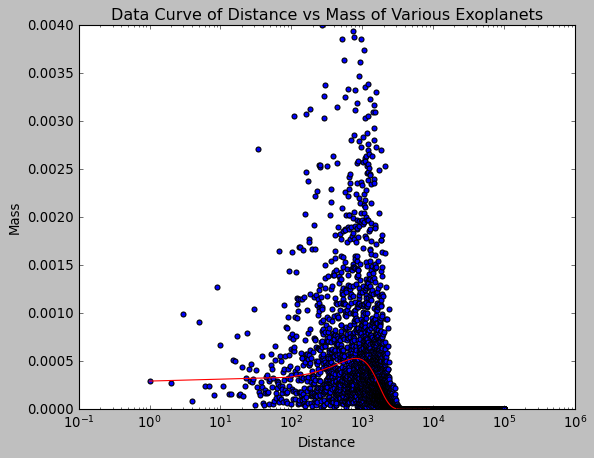

In [164]:
x=np.linspace(x.min(),x.max(),100)
y=f(x,m,std)
#intialized variables for curve 

plt.figure()
plt.xscale('log')
plt.ylim(0,0.004)
#axis scales 
plt.title('Data Curve of Distance vs Mass of Various Exoplanets')
plt.xlabel('Distance')
plt.ylabel('Mass')
#titles
plt.plot(x,y, color='red')
#plotting curve 

plt.scatter(xdata,ydata)
#plotting data with curve
plt.show()

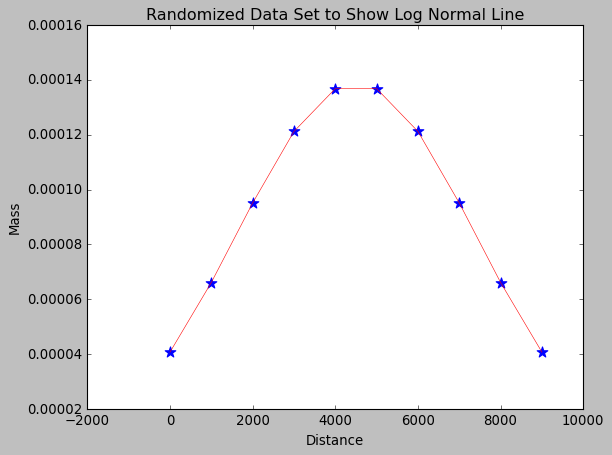

In [156]:
#I used the following website for inpspiration:
#https://www.geeksforgeeks.org/how-to-make-a-bell-curve-in-python/
#created this for a another reference curve for numpy generation

def pdf(x): 
    m = np.mean(x) 
    std = np.std(x) 
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - m)**2 / (2 * std**2))
    #standard deviatation equation 
    return y_out 
    
# To generate an array of x-values 
x = np.arange(10**0, 10**4, 1000) 
  
y = pdf(x) 
# Plotting the bell-shaped curve based on abouve function 

plt.style.use('classic') 
#Graph type
plt.figure() 
plt.plot(x, y, color = 'red', linestyle = 'solid', linewidth=0.5)
#plotted x and y in a red solid line with a width of 0.5

plt.scatter( x, y, marker = '*', s = 100, color = 'blue') 
#plotted the individual points, with stars for points in blue

plt.title('Randomized Data Set to Show Log Normal Line')
plt.xlabel('Distance')
plt.ylabel('Mass')
#titles 

plt.show()



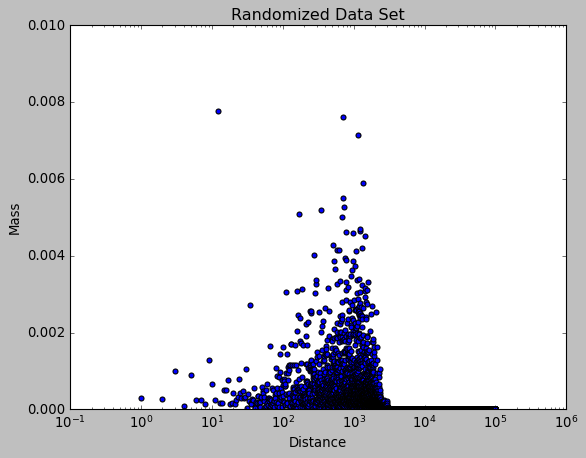

In [155]:
#generating a randomized plot generally fitting a standard deviation plot

m= 815 
std=750 
n=100000
#defined values 

xdata = np.arange(0,n)

#random number of values from 1 to 10000 and plotting a 1000 points 

ydata= 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (xdata - m)**2 / (2 * std**2)+np.random.standard_normal(size=n))
#equation for y based on x data 

plt.figure()
plt.ylim(0,0.010)
plt.xscale('log')
#adjusting x and y scales 
plt.title('Randomized Data Set')
plt.xlabel('Distance')
plt.ylabel('Mass')
#titles 
plt.scatter(xdata,ydata)
plt.show()

In [148]:
def f(x, m1, std1): 
    return 1/(std1 * np.sqrt(2 * np.pi)) * np.exp( - (x - m1)**2 / (2 * std1**2))
# genral standard deviation equation 
p0=[815, 750]
#generated std, and mean

In [149]:
parameters1, covariance_matrix1= fit.curve_fit(f, xdata, ydata, p0)
#generating correct mean and error from randomized data

In [150]:
parameters1

array([897.46853064, 487.51056521])

In [151]:
covariance_matrix1

array([[26.02185369, -1.20136675],
       [-1.20136675, 17.95406312]])

In [152]:
m1= parameters1[0]
std1=parameters1[1]
m1_error=(covariance_matrix1[0,0])**0.5
std1_error=(covariance_matrix1[1,1])**0.5
#pulling out my m1, std1, and errors using the method outlined in class

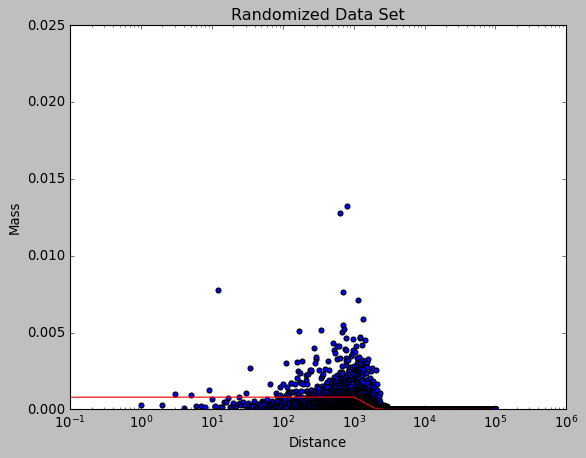

In [166]:
x= np.linspace(xdata.min(), xdata.max(),100)
#100 points between minimun data and maximum data

y=f(x,m1, std1)
plt.figure()
plt.plot(x,y,color='red')
#plotting my red curve 
plt.xscale('log')
plt.ylim(0,0.025)
#changing the scale to better fit the dataset
plt.title('Randomized Data Set')
plt.xlabel('Distance')
plt.ylabel('Mass')
#titles 
plt.scatter(xdata,ydata)
#plotting the randomized data
plt.show()
#returned a line for the given data, this line doesnt fit very well but 
#I am guessing that the data is not a true bell cruve 

In [ ]:
#In the above comments I have desrcibed the process and though behind each step, I choose to 
#use the Log-Normal model as this seemed to fit my data best. This looked like many of the distrubutions that I have seen in grade bins, so I decided to try it. 
#When looking at the generated and dataset table it does 
#appear to not fit. I troubledshooted this quite a bit but could never get it 
#to have the nicest fit. However I did include another graph with stars for reference on how I wanted to curve to look
#like. Based on the plotted data set and the seperate curve model I determined that this would be the best model for my 
#given data set. I think the error might have lied along the lines of an axis issue but I am not entirely sure. I additionally 
#was not really able to get the rest of my data to scatter with the line that I made to fit it. The curve looks like it is slightly off, 
#perhaps that this is an issue with my standard deviation or mean, I tried to fix this but ultimately was not successful. 
#The curve fitting overall was slightly weird, but I think that next time I can hopefully work out these buts to better fit the model. 
#I had attempted to make a negative parabola but that had not worked either. Overall, I tried to demonstrate my use of numpy, pandas, and 
#scipy packages, and noted where I used outside code for inspiration directly into the cell that I used it in. 
#The data that I used was from NASA's Exoplanet Archive, and I linked it in the relevant cells. Thank you for a great semester, I really 
#learned a lot, and I appreciate your time! 
